In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.makedirs('reference', exist_ok=True)

In [7]:
series_ref = pd.read_csv('input/reference/WDISeries.csv', usecols=['Series Code', 'Indicator Name', 'Topic'])
series_ref = series_ref[['Series Code', 'Indicator Name', 'Topic']].rename(columns={'Series Code': 'Indicator Code'})
series_ref

,Indicator Code,Indicator Name,Topic
0,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,Environment: Agricultural production
1,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,Environment: Agricultural production
2,AG.LND.AGRI.K2,Agricultural land (sq. km),Environment: Land use
3,AG.LND.AGRI.ZS,Agricultural land (% of land area),Environment: Land use
4,AG.LND.ARBL.HA,Arable land (hectares),Environment: Land use
...,...,...,...
1491,VC.IDP.NWDS,"Internally displaced persons, new displacement...",Public Sector: Conflict & fragility
1492,VC.IDP.TOCV,"Internally displaced persons, total displaced ...",Public Sector: Conflict & fragility
1493,VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...",Public Sector: Conflict & fragility
1494,VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)",Public Sector: Conflict & fragility


In [8]:
print(f"Missing topics: {series_ref['Topic'].isna().sum()}")
# series_ref[series_ref['Topic'].isna()]

Missing topics: 43


In [9]:
keywords = {
    'Climate': [
        'carbon', 'nitrous', 'oxide', 'greenhouse gas','methane']
    
    # add more as needed
}

for name in series_ref['Indicator Name']:
    for keyword, word in keywords.items():
        if any(word in name.lower() for word in word):
            series_ref.loc[series_ref['Indicator Name'] == name, 'Topic'] = keyword
            break

print(f"Missing topics: {series_ref['Topic'].isna().sum()}")

Missing topics: 0



Distribution of coarse topic categories:
Coarse_Topic
Economy & Finance              649
Health                         255
Education                      156
Environment & Climate          146
Social Development              87
Government & Governance         79
Other                           57
Infrastructure & Technology     36
Poverty & Inequality            24
Market                           7
Name: count, dtype: int64


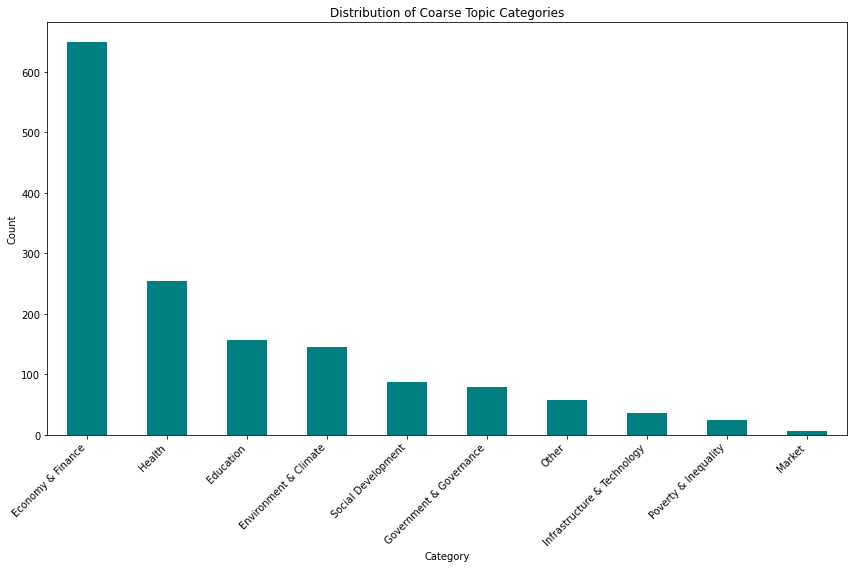


Complete mapping of original topics to coarse categories saved to 'indicator_lookup.csv'


In [10]:
# Create a function to map topics to more coarse categories
def map_to_coarse_category(topic):
    if pd.isna(topic):
        return "Other"
    
    topic_lower = str(topic).lower()
    
    # Poverty & Inequality category
    if any(term in topic_lower for term in ['poverty', 'gini', 'inequality', 'income distribution', 
                                          'wealth distribution', 'income gap', 'wealth gap']):
        return "Poverty & Inequality"
    
    # Economic categories
    elif any(term in topic_lower for term in ['economic', 'economy', 'finance', 'trade', 'business']):
        return "Economy & Finance"
    
    elif any(term in topic_lower for term in ['market']):
        return "Market"
    
    # Environmental categories
    elif any(term in topic_lower for term in ['environment', 'climate', 'emission', 'pollution', 'forest', 'energy']):
        return "Environment & Climate"
    
    # Social categories (excluding poverty)
    elif any(term in topic_lower for term in ['health']):
        return "Health"
    
    elif any(term in topic_lower for term in ['education']):
        return "Education"
    
     # Social categories (excluding poverty)
    elif any(term in topic_lower for term in ['social', 'urban', 'rural']):
        return "Social Development"
    
    elif any(term in topic_lower for term in ['education']):
        return "Gender"
    
    # Infrastructure categories
    elif any(term in topic_lower for term in ['infrastructure', 'transport', 'communication', 'technology']):
        return "Infrastructure & Technology"
    
    # Government categories
    elif any(term in topic_lower for term in ['government', 'public sector', 'governance', 'law', 'regulation']):
        return "Government & Governance"
    
    # Agriculture categories
    elif any(term in topic_lower for term in ['agriculture', 'farming', 'land', 'food']):
        return "Agriculture & Food"
    
    # Default category
    else:
        return "Other"

# Create a new column with coarse categories
series_ref['Coarse_Topic'] = series_ref['Topic'].apply(map_to_coarse_category)

# Count the distribution of coarse topics
coarse_counts = series_ref['Coarse_Topic'].value_counts()
print("\nDistribution of coarse topic categories:")
print(coarse_counts)

# Visualize the coarse categories
plt.figure(figsize=(12, 8))
coarse_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Coarse Topic Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('output/images/coarse_topic_distribution.png')
plt.show()
series_ref.to_csv('output/reference/indicator_lookup.csv', index=False)
print("\nComplete mapping of original topics to coarse categories saved to 'indicator_lookup.csv'")